In [1]:
### Importing and Reading CSV 

In [2]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from scipy import sparse
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
movies = pd.read_csv("./movies.csv")
ratings = pd.read_csv("./ratings.csv")

### Data Analysis And Preprocessing

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
ratings.shape

(100836, 4)

In [6]:
movies.shape

(9742, 3)

### Checking the data types of each column

In [7]:
movies.dtypes        #Checking the data types of each column

movieId     int64
title      object
genres     object
dtype: object

In [8]:
ratings.dtypes        #Checking the data types of each column

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

### Finding the Unique Values in each column

In [9]:
movies.nunique()     #Finding the Unique Values in each column

movieId    9742
title      9737
genres      951
dtype: int64

In [10]:
ratings.nunique()     #Finding the Unique Values in each column

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

### Analysing the total null values present in each column/Feature of the given Data set

In [11]:
movies.isnull().sum()    

movieId    0
title      0
genres     0
dtype: int64

In [12]:
ratings.isnull().sum()  

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

### Describing the Datasets

In [13]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [14]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


### Checking the Duplicates

In [15]:
movies_t=movies.T        #Transposing the data

In [16]:
movies_t.head()

,0,1,2,3,4,5,6,7,8,9,...,9732,9733,9734,9735,9736,9737,9738,9739,9740,9741
movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movi...,Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
genres,Adventure|Animation|Children|Comedy|Fantasy,Adventure|Children|Fantasy,Comedy|Romance,Comedy|Drama|Romance,Comedy,Action|Crime|Thriller,Comedy|Romance,Adventure|Children,Action,Action|Adventure|Thriller,...,Action|Animation|Comedy|Sci-Fi,Animation|Drama,Comedy|Drama,Animation,Documentary,Action|Animation|Comedy|Fantasy,Animation|Comedy|Fantasy,Drama,Action|Animation,Comedy


In [17]:
movies_t.head() .duplicated().sum()  

0

In [18]:
ratings_t=ratings.T    

In [19]:
ratings_t.head()

,0,1,2,3,4,5,6,7,8,9,...,100826,100827,100828,100829,100830,100831,100832,100833,100834,100835
userId,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.100000e+02,6.100000e+02,6.100000e+02,6.100000e+02,6.100000e+02,6.100000e+02,6.100000e+02,6.100000e+02,6.100000e+02,6.100000e+02
movieId,1.0,3.0,6.0,47.0,50.0,70.0,101.0,110.0,151.0,157.0,...,1.623500e+05,1.639370e+05,1.639810e+05,1.641790e+05,1.665280e+05,1.665340e+05,1.682480e+05,1.682500e+05,1.682520e+05,1.708750e+05
rating,4.0,4.0,4.0,5.0,5.0,3.0,5.0,4.0,5.0,5.0,...,3.500000e+00,3.500000e+00,3.500000e+00,5.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00
timestamp,964982703.0,964981247.0,964982224.0,964983815.0,964982931.0,964982400.0,964980868.0,964982176.0,964984041.0,964984100.0,...,1.493850e+09,1.493849e+09,1.493850e+09,1.493846e+09,1.493879e+09,1.493848e+09,1.493850e+09,1.494273e+09,1.493846e+09,1.493846e+09


In [20]:
ratings_t.head() .duplicated().sum()  

0

### No rows are duplicate

### Merging both the Data Sets on the basis of movieId

In [21]:
data = pd.merge(movies,ratings, on='movieId')
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [22]:
import datetime
from datetime import datetime, date
data['datetime'] = pd.to_datetime(data['timestamp'])  

In [23]:
data.head()

,movieId,title,genres,userId,rating,timestamp,datetime
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1970-01-01 00:00:00.964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1970-01-01 00:00:00.847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1970-01-01 00:00:01.106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,1970-01-01 00:00:01.510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1970-01-01 00:00:01.305696483


In [24]:
data.shape

(100836, 7)

In [25]:
data.nunique()

movieId       9724
title         9719
genres         951
userId         610
rating          10
timestamp    85043
datetime     85043
dtype: int64

### Average Rating

In [26]:
a = data.groupby('title')['rating'].mean()
sorted_data = a.sort_values(ascending=False).head()
sorted_data

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

### Total Number of User Rated  a Particular Movie

In [27]:
b = data.groupby('title')['rating'].agg('count')
sorted_data_ = b.sort_values(ascending=False).head()
sorted_data_

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

### EDA & Removing Noise from Data

### Making the new Dataframe having Avg rating and Total number of Rating

In [28]:
new_df = pd.DataFrame()

In [29]:
new_df['Average rating']=a
new_df['No of User Rated a Particular Movie']=b

In [30]:
new_df.head()

,Average rating,No of User Rated a Particular Movie
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [31]:
new_df.shape

(9719, 2)

In [32]:
sns.set_style('white')
%matplotlib inline

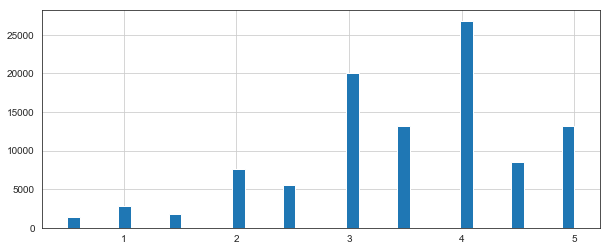

In [33]:
# plot graph of 'ratings' column
plt.figure(figsize =(10, 4))
 
ratings['rating'].hist(bins = 40)

### Number of Movies having Avg Rating of 3 and above, is more in our dataset Comparatively

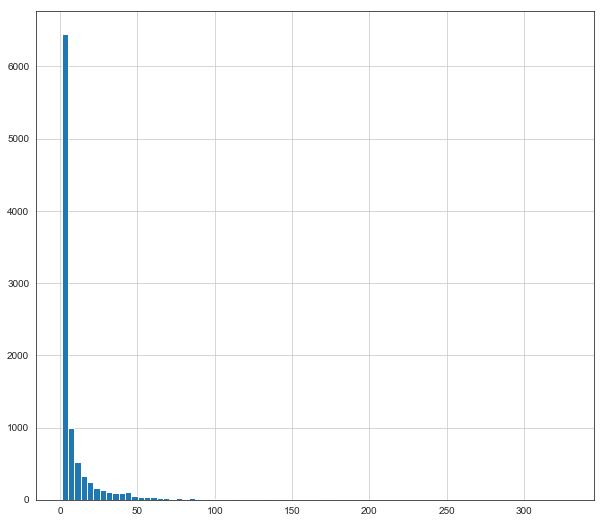

In [34]:
# plot graph of Number of total rating
plt.figure(figsize=(10,9))
new_df['No of User Rated a Particular Movie'].hist(bins=80)

### From the graph we can see that Most of the Movies have received less then 50 rating count and Most of the Movies having Rating count very low as in range 1-10 

<Figure size 576x432 with 0 Axes>

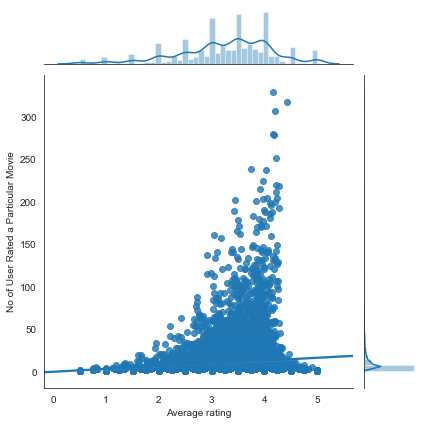

In [35]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Average rating',y='No of User Rated a Particular Movie',data=new_df,kind ='reg')

### From the graph we can say, in general, Movies with higher average ratings actually have more Number of User Rating, Compared with movies having low average rating

 Understanding the Rating data

In [36]:
ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [37]:
final_dataset = ratings.pivot_table(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


### userId 1 has rated movieId 1& 3 , but has not rated movieId 3,4,5

#### fixing NaN values with 0 so as to make it understandable by the Model

In [38]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
final_dataset.shape

(9724, 610)

### Removing Noise From Data

Reducing the noise by adding some filters for the final dataset.

To qualify a movie, a minimum of 10 users should have voted a movie.

To qualify a user, a minimum of 50 movies should have voted by the user.

In [40]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

#### Visualizing the number of users who voted with our threshold of 10

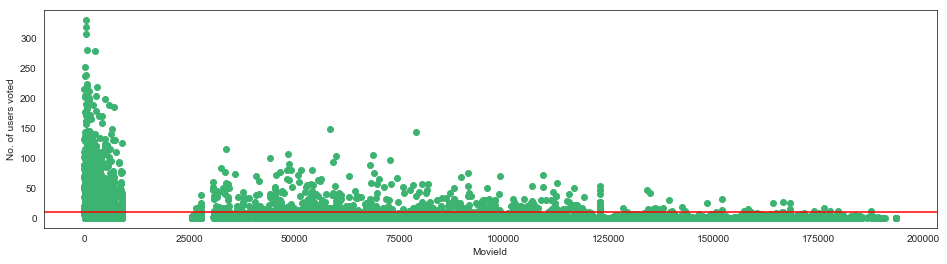

In [41]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

####  Modifying the final dataset accordingly

In [42]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

#### Visualizing the number of votes by each user must be > 50

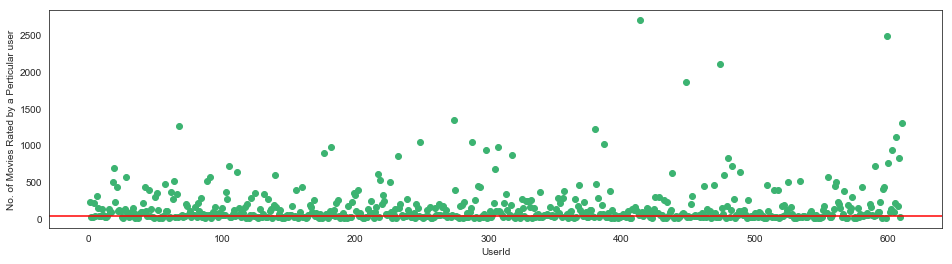

In [43]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of Movies Rated by a Perticular user')
plt.show()

####  Modifying the final dataset accordingly

In [44]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset.head()

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0


In [45]:
final_dataset.shape

(2121, 378)

### Removing sparsity

#### Final_dataset has dimensions = 2121 * 378, where most of the values are sparse, so removing the Sparsity.

##### How it is calculated =  The number of zero-valued elements divided by the total number of elements 

#### Example how it works

In [46]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


In [47]:
csr_sample = csr_matrix(sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


### Working with the original Data

 #### Using the csr_matrix function from the scipy library.

In [48]:
csr_data = csr_matrix(final_dataset)
final_dataset.reset_index(inplace=True)

In [49]:
print(csr_data) 

  (0, 0)	4.0
  (0, 3)	4.5
  (0, 6)	2.5
  (0, 8)	4.5
  (0, 9)	3.5
  (0, 10)	4.0
  (0, 12)	3.5
  (0, 16)	3.0
  (0, 19)	3.0
  (0, 20)	3.0
  (0, 25)	5.0
  (0, 28)	5.0
  (0, 29)	4.0
  (0, 31)	3.0
  (0, 34)	5.0
  (0, 38)	5.0
  (0, 39)	4.0
  (0, 40)	4.0
  (0, 41)	2.5
  (0, 43)	4.5
  (0, 46)	0.5
  (0, 47)	4.0
  (0, 50)	2.5
  (0, 53)	4.0
  (0, 55)	3.0
  :	:
  (2118, 205)	4.0
  (2118, 345)	1.5
  (2118, 357)	4.0
  (2118, 369)	4.5
  (2119, 37)	3.5
  (2119, 62)	3.0
  (2119, 98)	0.5
  (2119, 127)	4.5
  (2119, 156)	4.5
  (2119, 236)	0.5
  (2119, 256)	4.5
  (2119, 317)	2.0
  (2119, 345)	2.0
  (2119, 357)	5.0
  (2119, 365)	3.5
  (2120, 37)	4.0
  (2120, 62)	5.0
  (2120, 146)	2.5
  (2120, 155)	4.5
  (2120, 156)	5.0
  (2120, 186)	5.0
  (2120, 205)	4.0
  (2120, 236)	3.0
  (2120, 317)	3.5
  (2120, 357)	4.0


In [50]:
csr_data

<2121x378 sparse matrix of type '<class 'numpy.float64'>'
	with 72893 stored elements in Compressed Sparse Row format>

### Making the movie recommendation system model

In [51]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=-1, n_neighbors=20, p=2, radius=1.0)

In [52]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "Movies Not found"

In [53]:
def results(moviename):
    table=get_movie_recommendation(moviename)
    return table.to_dict();

In [54]:
table = results("Iron Man")
table

{'Distance': {1: 0.3688569117501048,
  2: 0.3687577424126396,
  3: 0.3685583176966156,
  4: 0.36602940514331395,
  5: 0.3627589745372938,
  6: 0.31089326180490995,
  7: 0.30749155823084806,
  8: 0.2981377590200208,
  9: 0.28583480118216587,
  10: 0.2853194248771902},
 'Title': {1: 'Up (2009)',
  2: 'Guardians of the Galaxy (2014)',
  3: 'Watchmen (2009)',
  4: 'Star Trek (2009)',
  5: 'Batman Begins (2005)',
  6: 'Avatar (2009)',
  7: 'Iron Man 2 (2010)',
  8: 'WALL·E (2008)',
  9: 'Dark Knight, The (2008)',
  10: 'Avengers, The (2012)'}}

### ----------------------------------------------------Thankyou-----------------------------------------------------------------------------------